In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 県別累積患者数

In [2]:
df = pd.read_csv('data/covid19_pref_accum_20200421.csv')

df.head()

,Unnamed: 0,date,神奈川県,東京都,愛知県,奈良県,北海道,大阪府,不明,千葉県,...,関西国際空港,岡山県,青森県,鹿児島県,富山県,山形県,島根県,鳥取県,Unnamed: 53,岩手県
0,0,01/15/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,01/16/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,01/17/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,01/18/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,01/19/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


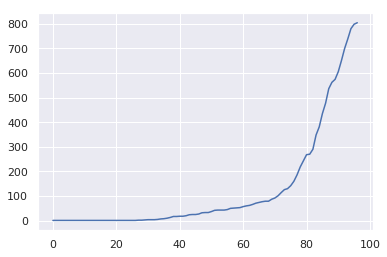

In [3]:
plt.Figure()
df["神奈川県"].plot()

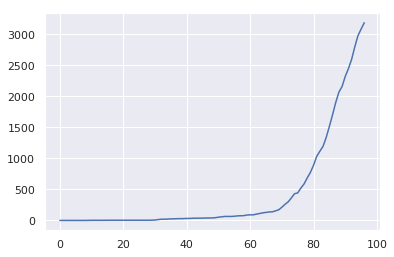

In [4]:
plt.Figure()
df["東京都"].plot()

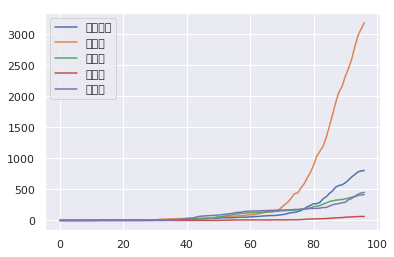

In [5]:
top5 = df.iloc[:, 2:7]
plt.Figure()
top5.plot()

## 地方別累積患者数

In [6]:
df2 = pd.read_csv('data/covid19_region_accum_20200421.csv')

df2.head()

,date,Hokkaido,Tohoku,Kanto,Chubu,Kinki,Chugoku,Shikoku,Kyusyu
0,01/15/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,01/16/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,01/17/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,01/18/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,01/19/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


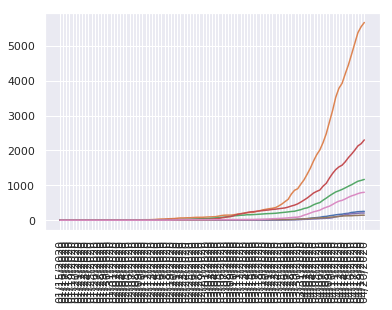

In [7]:
plt.Figure()
plt.xticks(rotation=90)
plt.plot(df2["date"], df2.iloc[:,2:])

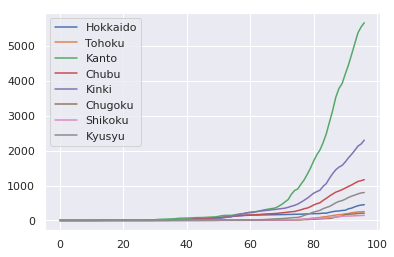

In [8]:
plt.Figure()
df2.plot()

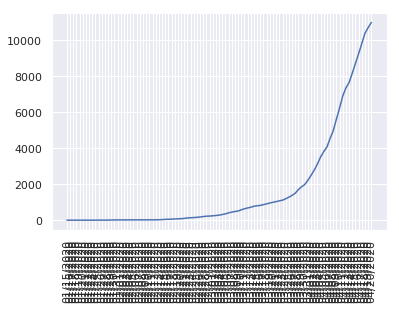

In [9]:
all_data = pd.DataFrame()
#all_data = df2
all_data = df2.drop(columns=["Hokkaido", "Tohoku", "Kanto", "Chubu", "Kinki", "Chugoku", "Shikoku", "Kyusyu"])
all_data["total"] = (df2.sum(axis=1))

plt.Figure()
plt.xticks(rotation=90)
plt.plot(all_data["date"], all_data["total"])

## 地方別患者数

In [10]:
df3 = pd.read_csv('data/covid19_region_20200421.csv')

df3.tail()

,date,Hokkaido,Tohoku,Kanto,Chubu,Kinki,Chugoku,Shikoku,Kyusyu
92,2020-04-16,20,25,303,43,100,10,1,40
93,2020-04-17,37,8,310,52,113,5,7,29
94,2020-04-18,31,14,311,48,122,10,2,36
95,2020-04-19,20,3,168,23,62,7,6,26
96,2020-04-20,10,6,122,29,109,0,1,12


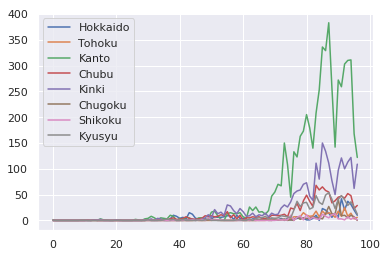

In [11]:
plt.Figure()
df3.plot()

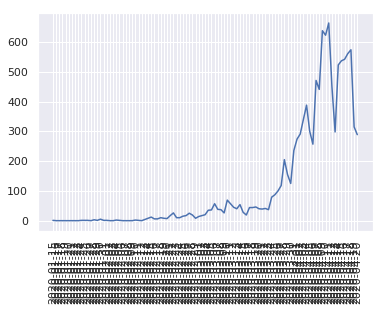

In [12]:
all_data2 = pd.DataFrame()
all_data2 = df3.drop(columns=["Hokkaido", "Tohoku", "Kanto", "Chubu", "Kinki", "Chugoku", "Shikoku", "Kyusyu"])
all_data2["total"] = (df3.sum(axis=1))

plt.Figure()
plt.xticks(rotation=90)
plt.plot(all_data2["date"], all_data2["total"])

In [13]:
all_data2.to_csv('data/all_data.csv')

## Data analysis

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


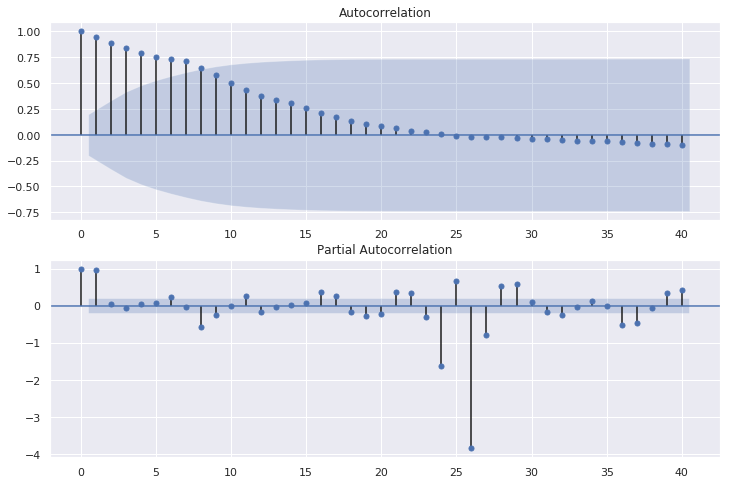

In [13]:
# コレログラム
# 後半になるにつれ相関係数が小さくなっていっている
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(all_data2.total, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(all_data2.total, lags=40, ax=ax2)

/home/tatsuki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


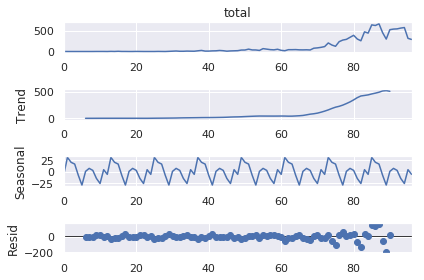

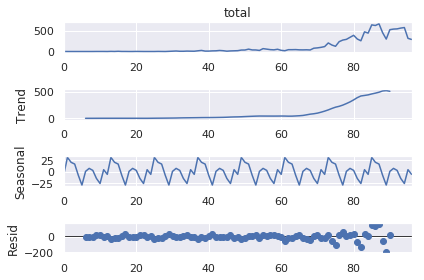

In [17]:
# データをトレンドと季節成分に分解
seasonal_decompose_res = sm.tsa.seasonal_decompose(all_data2.total, freq=12)
seasonal_decompose_res.plot()

データが定常かどうかを調べるため，単位根検定を行う

In [19]:
# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(all_data2.total, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(all_data2.total, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(all_data2.total, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:0.8815187325031784
c:0.993903373276937
nc:0.9536135360191689


In [32]:
diff = all_data.total.diff()
diff = diff.dropna()

# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(diff, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(diff, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(diff, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:0.8788613978015487
c:0.9937653539710858
nc:0.9528110662971631


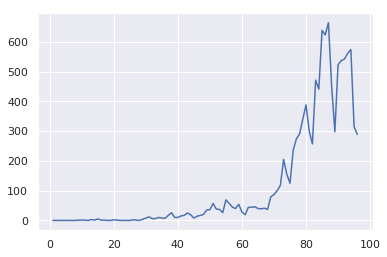

In [33]:
plt.plot(diff)

In [34]:
diff = diff.diff()
diff = diff.dropna()

# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(diff, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(diff, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(diff, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:0.049224340856433096
c:0.07489539443594104
nc:0.06579922605960407


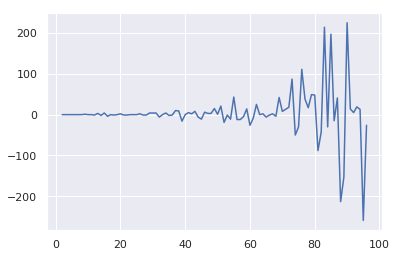

In [35]:
plt.plot(diff)

In [59]:
diff = diff.diff()
diff = diff.dropna()

# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(diff, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(diff, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(diff, regression="nc")

print("ct:", end="")
print(ct[1])
print("c:", end="")
print(c[1])
print("nc:", end="")
print(nc[1])

ct:7.153620159429127e-05
c:3.2843981392294112e-06
nc:1.135142307902795e-07


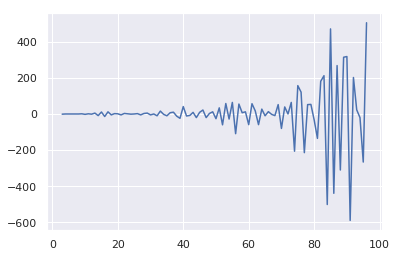

In [60]:
plt.plot(diff)

In [61]:
# たぶん和分過程なので、差分をとる
diff = all_data2.total - all_data2.total.shift()
diff = diff.dropna()

# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

{'aic':              0            1            2
 0          NaN  1055.125479  1054.226782
 1  1055.344019  1054.737810  1055.721728
 2  1055.676846  1055.374114  1058.681375
 3  1056.655811  1056.810369          NaN
 4  1057.383730  1057.394580  1027.192160, 'aic_min_order': (4, 2)}

In [62]:
# P-4, q=2 が最善となったので、それをモデル化
from statsmodels.tsa.arima_model import ARIMA
ARIMA_4_1_2 = ARIMA(all_data2.total, order=(4, 1, 2)).fit(dist=False)
ARIMA_4_1_2.params

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


const            2.368617
ar.L1.D.total    0.471698
ar.L2.D.total   -0.889979
ar.L3.D.total    0.059371
ar.L4.D.total   -0.635383
ma.L1.D.total   -0.703776
ma.L2.D.total    1.000000
dtype: float64

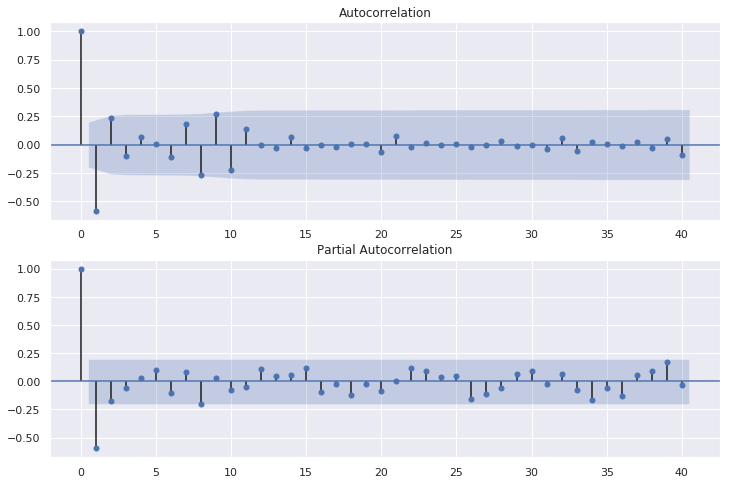

In [63]:
# 残差のチェック
resid = ARIMA_4_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

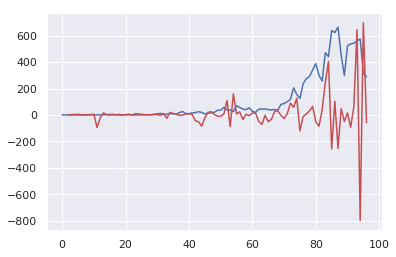

In [64]:
# 予測
pred = ARIMA_4_1_2.predict(all_data.index)

# 実データと予測結果の図示
plt.plot(all_data2.total)
plt.plot(pred, "r")
